In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load dataset
data = pd.read_csv('car.data', header=None)


In [35]:
# Column names based on the .names file information
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [107]:
# Encode categorical variables into numerical values using LabelEncoder
# This allows the machine learning models to work with categorical data
label_encoder = LabelEncoder()
# Applying label encoding to each column
data['buying'] = label_encoder.fit_transform(data['buying'])
data['maint'] = label_encoder.fit_transform(data['maint'])
data['doors'] = label_encoder.fit_transform(data['doors'])
data['persons'] = label_encoder.fit_transform(data['persons'])
data['lug_boot'] = label_encoder.fit_transform(data['lug_boot'])
data['safety'] = label_encoder.fit_transform(data['safety'])
data['class'] = label_encoder.fit_transform(data['class'])

In [108]:
# Display the first few rows of the dataset to verify that the encoding worked
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [109]:
# Split the dataset into features (X) and labels (y)
X = data.drop('class', axis=1)
y = data['class']

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
# --------------------------------- Decision Tree Classifier ---------------------------------
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# Make predictions using the decision tree model on the test data
y_pred_dt = dt_model.predict(X_test)

In [43]:
# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.97


In [44]:
# Generate classification report for Decision Tree
dt_classification_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", dt_classification_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



In [45]:
# Generate confusion matrix for Decision Tree
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", dt_confusion_matrix)

Decision Tree Confusion Matrix:
 [[111   6   1   0]
 [  1  18   0   0]
 [  4   0 354   0]
 [  3   0   0  21]]


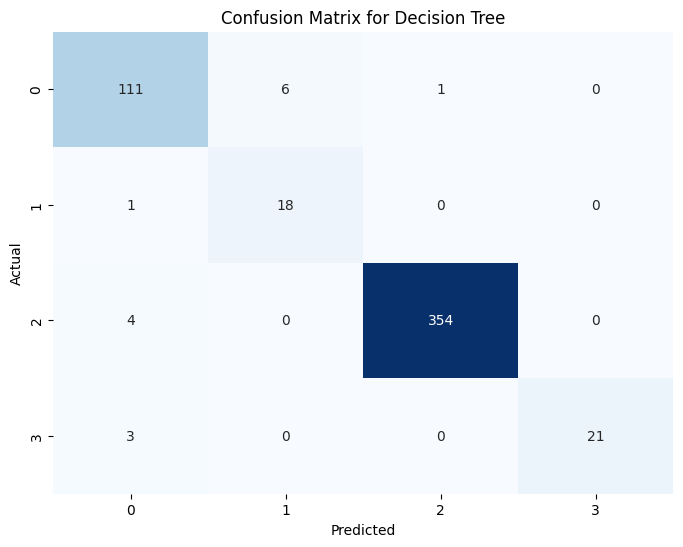

In [46]:
# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
# --------------------------------- Random Forest Classifier ---------------------------------
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Make predictions using the random forest model on the test data
y_pred_rf = rf_model.predict(X_test)

In [49]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.97


In [50]:
# Generate classification report for Random Forest
rf_classification_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", rf_classification_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       118
           1       0.71      0.89      0.79        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.97      0.97      0.97       519



In [51]:
# Generate confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", rf_confusion_matrix)

Random Forest Confusion Matrix:
 [[109   7   1   1]
 [  2  17   0   0]
 [  3   0 355   0]
 [  3   0   0  21]]


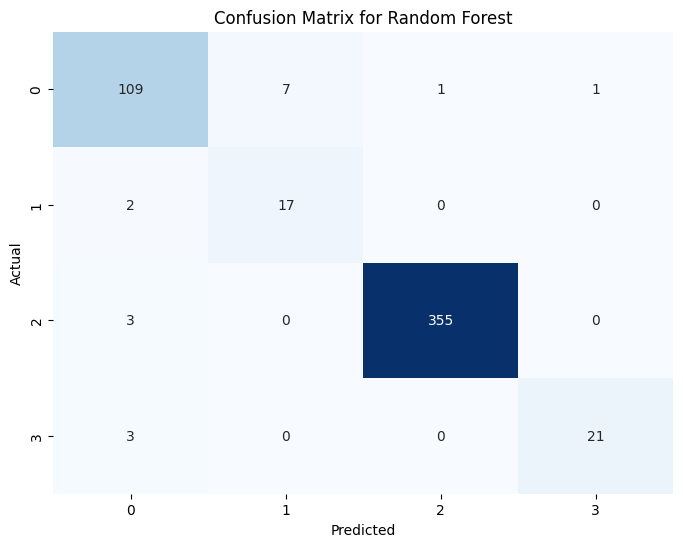

In [52]:
# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
# --------------------------------- Naive Bayes Classifier ---------------------------------
# Train a Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [54]:
# Make predictions using the Naive Bayes model on the test data
y_pred_nb = nb_model.predict(X_test)

In [55]:
# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")

Naive Bayes Accuracy: 0.65


In [56]:
# Generate classification report for Naive Bayes
nb_classification_report = classification_report(y_test, y_pred_nb , zero_division=0)
print("Naive Bayes Classification Report:\n", nb_classification_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.09      0.16       118
           1       0.00      0.00      0.00        19
           2       0.84      0.84      0.84       358
           3       0.17      1.00      0.30        24

    accuracy                           0.65       519
   macro avg       0.37      0.48      0.32       519
weighted avg       0.70      0.65      0.63       519



In [57]:
# Generate confusion matrix for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:\n", nb_confusion_matrix)

Naive Bayes Confusion Matrix:
 [[ 11   0  51  56]
 [  5   0   5   9]
 [  7   0 302  49]
 [  0   0   0  24]]


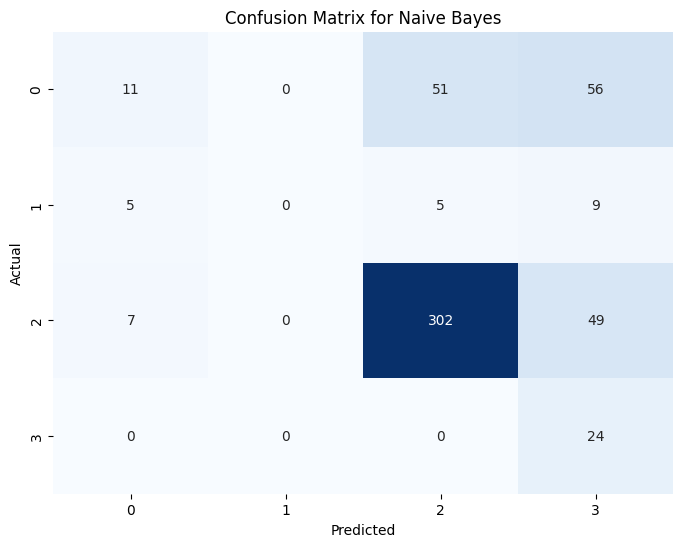

In [58]:
# Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
# --------------------------------- Artificial Neural Network (ANN) ---------------------------------
# Normalize feature set for ANN
X_train_norm = X_train / X_train.max()
X_test_norm = X_test / X_test.max()

In [69]:
# Build the ANN model
ann_model = Sequential()
ann_model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer to define input shape
ann_model.add(Dense(128, activation='relu'))  # Increased neurons
ann_model.add(Dropout(0.3))  # Lowered dropout
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))  # Lowered dropout
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

In [72]:
# Compile the ANN model with a lower learning rate
ann_model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
# Train the ANN model for more epochs
history = ann_model.fit(X_train_norm, y_train, epochs=100, batch_size=32, validation_data=(X_test_norm, y_test))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3751 - loss: 1.3355 - val_accuracy: 0.6898 - val_loss: 1.0351
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: 0.9615 - val_accuracy: 0.6898 - val_loss: 0.8356
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss: 0.8136 - val_accuracy: 0.6917 - val_loss: 0.7876
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7070 - loss: 0.7627 - val_accuracy: 0.6956 - val_loss: 0.7532
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - loss: 0.7754 - val_accuracy: 0.6917 - val_loss: 0.7284
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.6814 - val_accuracy: 0.6744 - val_loss: 0.7081
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 0.7116 - val_accuracy: 0.6802 - val_loss: 0.6912
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6999 - loss: 0.6979 - val_accuracy: 0.6840 - v

In [74]:
# Make predictions using the ANN model on the test data
y_pred_ann = np.argmax(ann_model.predict(X_test_norm), axis=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [75]:
# Evaluate ANN
ann_accuracy = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {ann_accuracy:.2f}")

ANN Accuracy: 0.96


In [76]:
# Generate classification report for ANN
ann_classification_report = classification_report(y_test, y_pred_ann, zero_division=0)
print("ANN Classification Report:\n", ann_classification_report)

ANN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       118
           1       0.81      0.89      0.85        19
           2       0.97      0.99      0.98       358
           3       1.00      0.92      0.96        24

    accuracy                           0.96       519
   macro avg       0.93      0.92      0.92       519
weighted avg       0.96      0.96      0.96       519



In [77]:
# Generate confusion matrix for ANN
ann_confusion_matrix = confusion_matrix(y_test, y_pred_ann)
print("ANN Confusion Matrix:\n", ann_confusion_matrix)

ANN Confusion Matrix:
 [[102   4  12   0]
 [  2  17   0   0]
 [  2   0 356   0]
 [  2   0   0  22]]


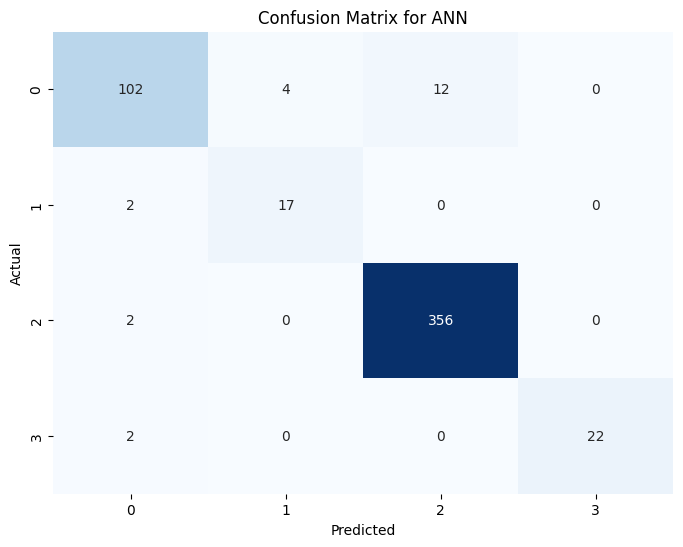

In [78]:
# Plot Confusion Matrix for ANN
plt.figure(figsize=(8, 6))
sns.heatmap(ann_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
# Compare metrics for Decision Tree, Random Forest, Naive Bayes, and ANN

# Store metrics for each model
metrics_comparison = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [80]:
# Decision Tree Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
metrics_comparison["Model"].append("Decision Tree")
metrics_comparison["Accuracy"].append(dt_accuracy)
metrics_comparison["Precision"].append(dt_report['weighted avg']['precision'])
metrics_comparison["Recall"].append(dt_report['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(dt_report['weighted avg']['f1-score'])

In [81]:
# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
metrics_comparison["Model"].append("Random Forest")
metrics_comparison["Accuracy"].append(rf_accuracy)
metrics_comparison["Precision"].append(rf_report['weighted avg']['precision'])
metrics_comparison["Recall"].append(rf_report['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(rf_report['weighted avg']['f1-score'])

In [83]:
# Naive Bayes Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb, output_dict=True, zero_division=0)
metrics_comparison["Model"].append("Naive Bayes")
metrics_comparison["Accuracy"].append(nb_accuracy)
metrics_comparison["Precision"].append(nb_report['weighted avg']['precision'])
metrics_comparison["Recall"].append(nb_report['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(nb_report['weighted avg']['f1-score'])

In [84]:
# ANN Metrics (Improved ANN)
ann_accuracy = accuracy_score(y_test, y_pred_ann)
ann_report = classification_report(y_test, y_pred_ann, output_dict=True, zero_division=0)
metrics_comparison["Model"].append("ANN")
metrics_comparison["Accuracy"].append(ann_accuracy)
metrics_comparison["Precision"].append(ann_report['weighted avg']['precision'])
metrics_comparison["Recall"].append(ann_report['weighted avg']['recall'])
metrics_comparison["F1-Score"].append(ann_report['weighted avg']['f1-score'])


In [85]:
# Convert metrics comparison to DataFrame
metrics_df = pd.DataFrame(metrics_comparison)

In [86]:
# Display the metrics comparison DataFrame
print(metrics_df)

           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  0.971098   0.973620  0.971098  0.971730
1  Random Forest  0.967245   0.969737  0.967245  0.968005
2    Naive Bayes  0.649326   0.698668  0.649326  0.631064
3    Naive Bayes  0.649326   0.698668  0.649326  0.631064
4            ANN  0.957611   0.957903  0.957611  0.957064


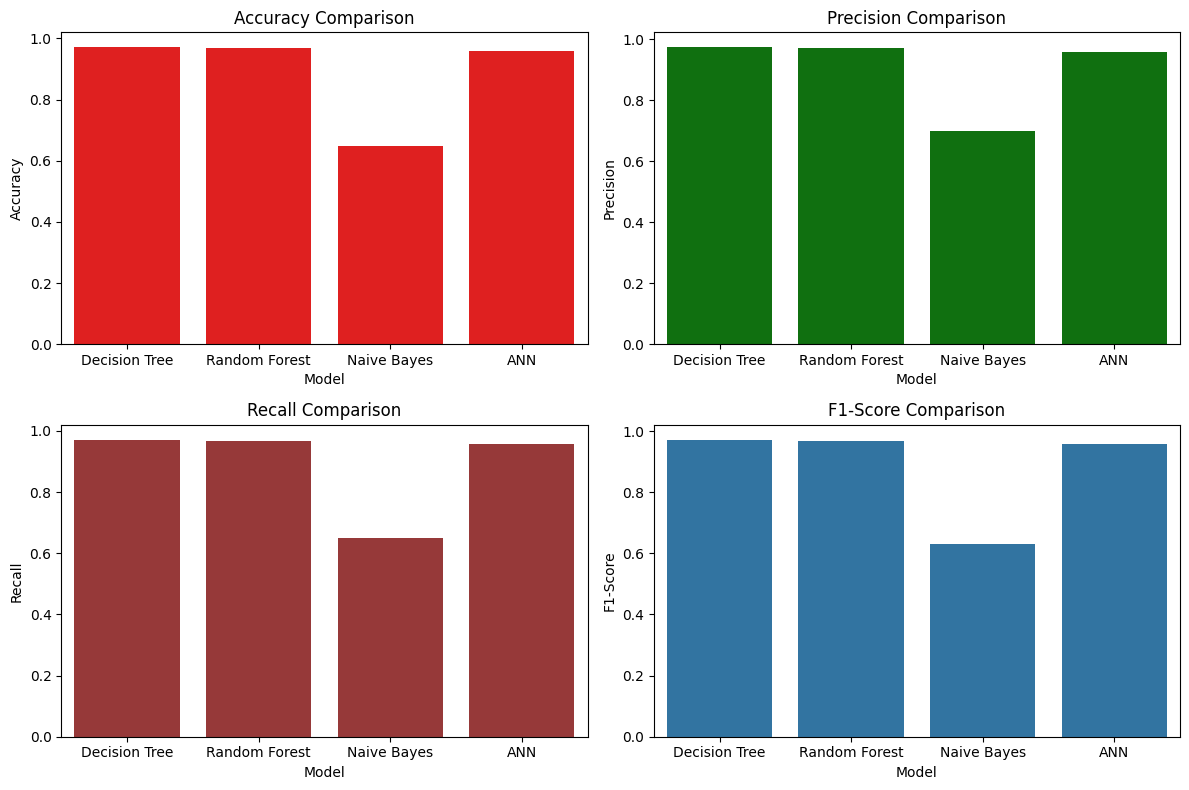

In [106]:
# Plotting the metrics for comparison
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Accuracy", data=metrics_df, color='red')
plt.title("Accuracy Comparison")

# Plot precision
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision", data=metrics_df, color='green')
plt.title("Precision Comparison")

# Plot recall
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall", data=metrics_df, color='brown')
plt.title("Recall Comparison")

# Plot F1-score
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1-Score", data=metrics_df)
plt.title("F1-Score Comparison")

plt.tight_layout()
plt.show()